# Note

1.　Numpy.array

2.　線形代数

# 線形代数

## Numpy.array

### Numpy

Pythonの（基本的な）数値計算ライブラリ

sin, exp, asin などの基本的な関数のほか、

線形代数などをサポートする

このライブラリを用いるには以下のようにする

In [1]:
import numpy as np

### np.array

1 list型に似た構造。

2 二次元・三次元などの多次元構造をサポート

3 データ型・大きさは事前に指定する必要あり

In [3]:
# np.array型の作り方

# サイズ10のベクトルを作成
vec_a = np.ndarray(10)

# サイズ5x10のマトリックスを作成
mat_b = np.ndarray((5, 10))

In [5]:
# データには ［］ でアクセスする

# 代入 
vec_a[1] = 1.0
mat_b[1,4] = 2.0

# 読出し
print vec_a[1], mat_b[1,4]

 1.0 2.0


In [8]:
# スライスも使える
vec_a[2:10] = 0.0
vec_a[0] = 2.0

print vec_a

[ 2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


## 線形演算

In [13]:
# 和、差
vec_a = np.arange(0, 1, 0.1)
vec_b = np.arange(0, 2, 0.2)
vec_c = vec_a + vec_b

print 'vec_a =', vec_a
print 'vec_b =', vec_b
print 'vec_c =', vec_c

vec_a = [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
vec_b = [ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8]
vec_c = [ 0.   0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7]


In [14]:
# 内積（ドット積）
print "a dot b = ", np.dot(vec_a, vec_b)

a dot b =  5.7


In [15]:
# 要素積
print "a * b = ", vec_a * vec_b

a * b =  [ 0.    0.02  0.08  0.18  0.32  0.5   0.72  0.98  1.28  1.62]


In [22]:
# 逆行列
mat_c = np.random.randn(3,3)
print 'mat_c = '
print mat_c

inv_c = np.linalg.inv(mat_c)
print 'inv_c = '
print inv_c

mat_c = 
[[-0.46069112 -0.66713647 -0.36786955]
 [-1.29150856 -1.00761822  0.87512984]
 [-0.07997831  1.43295736 -0.95610688]]
inv_c = 
[[-0.16948184 -0.67936369 -0.55661584]
 [-0.76089729  0.23970171  0.51216143]
 [-1.12621142  0.41607973 -0.23174953]]


In [24]:
# 線形方程式の解
vec_c = np.random.randn(3)

solution = np.linalg.solve(mat_c, vec_c)
print 'solution :'
print solution

solution :
[ 1.13177768 -0.24116484  0.07646277]


# 宿題

## 多項式フィッティング

以下のデータ［$x_i, y_i$］を、N次多項式で近似せよ。

$N=1,3, 10$の結果と、データ点を重ねて描画せよ

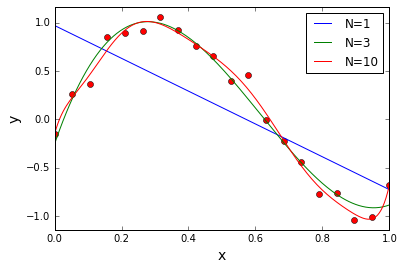

In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 1.0, 20)
y = np.sin(x*5.0) + np.random.randn(len(x))*0.1
plt.plot(x, y, 'ro')

Nname=[[1,'N=1'],[3,'N=3'],[10,'N=10']]
for N,name in Nname:
    z = np.poly1d(np.polyfit(x, y, N))
    t = np.linspace(0, 1.0, 200)
    plt.plot(t,z(t),'-',label=name)
    plt.ylim(y.min() * 1.1, y.max() * 1.1)
    plt.legend(loc='upper right')
    plt.xlabel("x",fontsize=14)
    plt.ylabel('y',fontsize=14)

## 数学的背景

$N$次多項式$p(x)$ は以下のように表せる
$$
p(x) = \sum_{j=0}^{N} c_j x^j
$$

${\bf x}=\{x_0, x_1, ..., x_i, ...\}$ における多項式の値${\bf p}$は、以下の行列で表せる

$$
{\bf p} = \Phi {\bf c}
$$

ここで、$\Phi_{i,j} = x_i^{\;j}$、${\bf c} = \{c_0, c_1, ..., c_j, ..., c_N\}$である。

データ点 ${\bf y}$ と、近似点 ${\bf p}$ との差の二乗和${\cal L}$
$$
{\cal L} = \sum_{i}{(y_i-p_i)^2} = |{\bf y} - \Phi {\bf c}|^2
$$

を最小にする${\bf c}$が、データ点を最も再現する多項式を作る。

この${\bf c}$は、$\frac{\mathrm{d}\cal L}{\mathrm{d}c} = 0$ を満たす。
$$
\frac{\mathrm{d}\cal L}{\mathrm{d}c} = -2 \Phi^t ({\bf y} - \Phi {\bf c}) = -2 (\Phi^t {\bf y} - \Phi^t \Phi {\bf c})
$$ 
ここから、
$$
{\bf c} = (\Phi^t \Phi)^{-1}\Phi^t {\bf y}
$$
が求まる